In [2]:
import psycopg2
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

In [ ]:
#https://pynative.com/python-postgresql-tutorial/
https://fb.watch/84Np7vVJAX/

In [2]:
from psycopg2 import Error
#psycopg2.connect()
try:
    # Connect to an existing database
    connection = psycopg2.connect(user="lhl_student",
                                  password="lhl_student",
                                  host="mid-term-project.ca2jkepgjpne.us-east-2.rds.amazonaws.com",
                                  port="5432",
                                  database="mid_term_project")

    # Create a cursor to perform database operations
    cursor = connection.cursor()
    # Print PostgreSQL details
    print("PostgreSQL server information")
    print(connection.get_dsn_parameters(), "\n")
    # Executing a SQL query
    cursor.execute("SELECT version();")
    # Fetch result
    record = cursor.fetchone()
    print("You are connected to - ", record, "\n")

except (Exception, Error) as error:
    print("Error while connecting to PostgreSQL", error)
finally:
    if (connection):
        cursor.close()
        connection.close()
        print("PostgreSQL connection is closed")

PostgreSQL server information
{'user': 'lhl_student', 'channel_binding': 'prefer', 'dbname': 'mid_term_project', 'host': 'mid-term-project.ca2jkepgjpne.us-east-2.rds.amazonaws.com', 'port': '5432', 'tty': '', 'options': '', 'sslmode': 'prefer', 'sslcompression': '0', 'ssl_min_protocol_version': 'TLSv1.2', 'gssencmode': 'disable', 'krbsrvname': 'postgres', 'target_session_attrs': 'any'} 

You are connected to -  ('PostgreSQL 11.12 on x86_64-pc-linux-gnu, compiled by gcc (GCC) 4.8.3 20140911 (Red Hat 4.8.3-9), 64-bit',) 

PostgreSQL connection is closed


In [3]:
data=pd.read_csv('flights.txt')

In [4]:
pd.set_option('display.max_columns',100)
print(data.shape)
data.head(10)

(10000, 42)


,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-10-21,DL,DL_CODESHARE,DL,5187,9E,N834AY,5187,11193,CVG,"Cincinnati, OH",14492,RDU,"Raleigh/Durham, NC",702,656.0,-6.0,11.0,707.0,808.0,7.0,832,815.0,-17.0,0,NaN,0,N,90,79.0,61.0,1,390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-10-21,DL,DL_CODESHARE,DL,5188,9E,N655CA,5188,11042,CLE,"Cleveland, OH",12953,LGA,"New York, NY",1935,2019.0,44.0,16.0,2035.0,2147.0,8.0,2119,2155.0,36.0,0,NaN,0,N,104,96.0,72.0,1,419,0.0,0.0,11.0,0.0,25.0,NaN,NaN,NaN,NaN
2,2019-10-21,DL,DL_CODESHARE,DL,5188,9E,N655CA,5188,12953,LGA,"New York, NY",11042,CLE,"Cleveland, OH",1712,1756.0,44.0,24.0,1820.0,1924.0,7.0,1900,1931.0,31.0,0,NaN,0,N,108,95.0,64.0,1,419,0.0,0.0,0.0,0.0,31.0,NaN,NaN,NaN,NaN
3,2019-10-21,DL,DL_CODESHARE,DL,5189,9E,N915XJ,5189,12953,LGA,"New York, NY",14730,SDF,"Louisville, KY",913,920.0,7.0,51.0,1011.0,1159.0,5.0,1147,1204.0,17.0,0,NaN,0,N,154,164.0,108.0,1,659,3.0,0.0,10.0,0.0,4.0,NaN,NaN,NaN,NaN
4,2019-10-21,DL,DL_CODESHARE,DL,5189,9E,N915XJ,5189,14730,SDF,"Louisville, KY",12953,LGA,"New York, NY",1222,1301.0,39.0,17.0,1318.0,1454.0,6.0,1436,1500.0,24.0,0,NaN,0,N,134,119.0,96.0,1,659,0.0,0.0,14.0,0.0,10.0,NaN,NaN,NaN,NaN
5,2019-10-21,DL,DL_CODESHARE,DL,5192,9E,N197PQ,5192,12953,LGA,"New York, NY",14492,RDU,"Raleigh/Durham, NC",1230,1223.0,-7.0,37.0,1300.0,1406.0,11.0,1428,1417.0,-11.0,0,NaN,0,N,118,114.0,66.0,1,431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2019-10-21,DL,DL_CODESHARE,DL,5193,9E,N8839E,5193,11203,CWA,"Mosinee, WI",11433,DTW,"Detroit, MI",1312,1354.0,42.0,15.0,1409.0,1610.0,9.0,1534,1619.0,45.0,0,NaN,0,N,82,85.0,61.0,1,363,1.0,0.0,3.0,0.0,41.0,NaN,NaN,NaN,NaN
7,2019-10-21,DL,DL_CODESHARE,DL,5193,9E,N8839E,5193,11433,DTW,"Detroit, MI",11203,CWA,"Mosinee, WI",1215,1310.0,55.0,12.0,1322.0,1323.0,5.0,1245,1328.0,43.0,0,NaN,0,N,90,78.0,61.0,1,363,0.0,0.0,0.0,0.0,43.0,NaN,NaN,NaN,NaN
8,2019-10-21,DL,DL_CODESHARE,DL,5194,9E,N937XJ,5194,10397,ATL,"Atlanta, GA",12197,HPN,"White Plains, NY",941,958.0,17.0,28.0,1026.0,1211.0,3.0,1200,1214.0,14.0,0,NaN,0,N,139,136.0,105.0,1,780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2019-10-21,DL,DL_CODESHARE,DL,5194,9E,N937XJ,5194,12197,HPN,"White Plains, NY",10397,ATL,"Atlanta, GA",1238,1252.0,14.0,11.0,1303.0,1500.0,7.0,1501,1507.0,6.0,0,NaN,0,N,143,135.0,117.0,1,780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.isnull().sum()

fl_date                    0
mkt_unique_carrier         0
branded_code_share         0
mkt_carrier                0
mkt_carrier_fl_num         0
op_unique_carrier          0
tail_num                  13
op_carrier_fl_num          0
origin_airport_id          0
origin                     0
origin_city_name           0
dest_airport_id            0
dest                       0
dest_city_name             0
crs_dep_time               0
dep_time                 100
dep_delay                100
taxi_out                 101
wheels_off               101
wheels_on                108
taxi_in                  108
crs_arr_time               0
arr_time                 108
arr_delay                128
cancelled                  0
cancellation_code       9898
diverted                   0
dup                        0
crs_elapsed_time           0
actual_elapsed_time      128
air_time                 128
flights                    0
distance                   0
carrier_delay           7917
weather_delay 

In [15]:
#Looking at data that is not null for specific delay
df=data[data['carrier_delay']>0]
matrix=df.corr()
matrix

,mkt_carrier_fl_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
mkt_carrier_fl_num,1.000000,1.000000,0.134715,-0.037685,-0.019041,-0.004307,0.171361,0.267160,0.004504,-0.000722,0.034403,0.000645,-0.001567,0.190627,NaN,NaN,-0.317934,-0.293653,-0.341085,NaN,-0.363075,0.161448,NaN,-0.020521,NaN,0.082784,0.299583,0.102913,0.102913,NaN
op_carrier_fl_num,1.000000,1.000000,0.134715,-0.037685,-0.019041,-0.004307,0.171361,0.267160,0.004504,-0.000722,0.034403,0.000645,-0.001567,0.190627,NaN,NaN,-0.317934,-0.293653,-0.341085,NaN,-0.363075,0.161448,NaN,-0.020521,NaN,0.082784,0.299583,0.102913,0.102913,NaN
origin_airport_id,0.134715,0.134715,1.000000,0.011647,-0.106134,-0.089798,0.156664,0.118461,-0.096398,-0.036530,0.200360,-0.067685,-0.029634,0.155435,NaN,NaN,0.063398,0.054962,0.020127,NaN,0.050853,0.122458,NaN,0.031010,NaN,0.070182,0.071788,-0.095463,-0.095463,NaN
dest_airport_id,-0.037685,-0.037685,0.011647,1.000000,0.028075,0.025482,-0.010366,0.027736,0.016345,0.009628,0.002879,0.024675,0.017057,-0.006664,NaN,NaN,0.110015,0.111960,0.109370,NaN,0.101997,-0.007555,NaN,0.028629,NaN,-0.007846,0.008250,-0.027036,-0.027036,NaN
crs_dep_time,-0.019041,-0.019041,-0.106134,0.028075,1.000000,0.884521,-0.008353,-0.047829,0.836895,0.392077,-0.039519,0.719268,0.360986,-0.026032,NaN,NaN,-0.039724,-0.058994,-0.049261,NaN,-0.042356,-0.060970,NaN,-0.071444,NaN,0.084831,0.997242,0.024178,0.024178,NaN
dep_time,-0.004307,-0.004307,-0.089798,0.025482,0.884521,1.000000,0.012741,-0.071736,0.949785,0.472278,-0.039361,0.662937,0.440811,-0.010699,NaN,NaN,-0.034015,-0.060851,-0.047616,NaN,-0.039885,-0.067987,NaN,-0.067945,NaN,0.127624,0.676014,-0.365829,-0.365829,NaN
dep_delay,0.171361,0.171361,0.156664,-0.010366,-0.008353,0.012741,1.000000,-0.074121,0.010443,-0.031669,-0.016006,0.012915,-0.030379,0.985657,NaN,NaN,-0.043875,-0.094190,-0.083247,NaN,-0.056597,0.858776,NaN,-0.075177,NaN,0.373326,0.153150,0.290377,0.290377,NaN
taxi_out,0.267160,0.267160,0.118461,0.027736,-0.047829,-0.071736,-0.074121,1.000000,-0.042764,0.032787,0.013379,-0.011297,0.028409,0.020737,NaN,NaN,-0.024632,0.088760,-0.059391,NaN,-0.067070,-0.005036,NaN,0.342184,NaN,-0.053958,0.038379,0.092663,0.092663,NaN
wheels_off,0.004504,0.004504,-0.096398,0.016345,0.836895,0.949785,0.010443,-0.042764,1.000000,0.504300,-0.045571,0.675116,0.471523,-0.008621,NaN,NaN,-0.060712,-0.081724,-0.072558,NaN,-0.072290,-0.062341,NaN,-0.071508,NaN,0.122223,0.676152,-0.358849,-0.358849,NaN
wheels_on,-0.000722,-0.000722,-0.036530,0.009628,0.392077,0.472278,-0.031669,0.032787,0.504300,1.000000,-0.025791,0.632232,0.964408,-0.035861,NaN,NaN,0.006933,0.002992,0.000510,NaN,0.004381,-0.053006,NaN,-0.056240,NaN,0.045520,0.306697,-0.256663,-0.256663,NaN


In [16]:
df.head(10)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
3,2019-10-21,DL,DL_CODESHARE,DL,5189,9E,N915XJ,5189,12953,LGA,"New York, NY",14730,SDF,"Louisville, KY",913,920.0,7.0,51.0,1011.0,1159.0,5.0,1147,1204.0,17.0,0,NaN,0,N,154,164.0,108.0,1,659,3.0,0.0,10.0,0.0,4.0,NaN,NaN,NaN,NaN
6,2019-10-21,DL,DL_CODESHARE,DL,5193,9E,N8839E,5193,11203,CWA,"Mosinee, WI",11433,DTW,"Detroit, MI",1312,1354.0,42.0,15.0,1409.0,1610.0,9.0,1534,1619.0,45.0,0,NaN,0,N,82,85.0,61.0,1,363,1.0,0.0,3.0,0.0,41.0,NaN,NaN,NaN,NaN
10,2019-10-21,DL,DL_CODESHARE,DL,5195,9E,N922XJ,5195,11433,DTW,"Detroit, MI",15380,TVC,"Traverse City, MI",2220,749.0,569.0,16.0,805.0,839.0,3.0,2321,842.0,561.0,0,NaN,0,N,61,53.0,34.0,1,207,561.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
17,2019-10-21,DL,DL_CODESHARE,DL,5200,9E,N309PQ,5200,12478,JFK,"New York, NY",14122,PIT,"Pittsburgh, PA",1455,1555.0,60.0,27.0,1622.0,1725.0,5.0,1651,1730.0,39.0,0,NaN,0,N,116,95.0,63.0,1,340,39.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
38,2019-10-21,DL,DL_CODESHARE,DL,5219,9E,N136EV,5219,11193,CVG,"Cincinnati, OH",12266,IAH,"Houston, TX",1600,1706.0,66.0,8.0,1714.0,1840.0,9.0,1745,1849.0,64.0,0,NaN,0,N,165,163.0,146.0,1,871,6.0,0.0,58.0,0.0,0.0,NaN,NaN,NaN,NaN
41,2019-10-21,DL,DL_CODESHARE,DL,5221,9E,N920XJ,5221,11977,GRB,"Green Bay, WI",13487,MSP,"Minneapolis, MN",1734,1813.0,39.0,13.0,1826.0,1918.0,10.0,1900,1928.0,28.0,0,NaN,0,N,86,75.0,52.0,1,252,2.0,0.0,0.0,0.0,26.0,NaN,NaN,NaN,NaN
43,2019-10-21,DL,DL_CODESHARE,DL,5224,9E,N294PQ,5224,12953,LGA,"New York, NY",15016,STL,"St. Louis, MO",1630,1709.0,39.0,27.0,1736.0,1850.0,7.0,1821,1857.0,36.0,0,NaN,0,N,171,168.0,134.0,1,888,1.0,0.0,0.0,0.0,35.0,NaN,NaN,NaN,NaN
45,2019-10-21,DL,DL_CODESHARE,DL,5226,9E,N146PQ,5226,10397,ATL,"Atlanta, GA",10685,BMI,"Bloomington/Normal, IL",2107,2129.0,22.0,17.0,2146.0,2158.0,4.0,2146,2202.0,16.0,0,NaN,0,N,99,93.0,72.0,1,533,4.0,0.0,0.0,0.0,12.0,NaN,NaN,NaN,NaN
52,2019-10-21,DL,DL_CODESHARE,DL,5233,9E,N324PQ,5233,14492,RDU,"Raleigh/Durham, NC",15304,TPA,"Tampa, FL",1452,1526.0,34.0,12.0,1538.0,1711.0,4.0,1655,1715.0,20.0,0,NaN,0,N,123,109.0,93.0,1,587,2.0,0.0,0.0,0.0,18.0,NaN,NaN,NaN,NaN
57,2019-10-21,DL,DL_CODESHARE,DL,5236,9E,N676CA,5236,10994,CHS,"Charleston, SC",11433,DTW,"Detroit, MI",1251,1759.0,308.0,12.0,1811.0,1945.0,7.0,1459,1952.0,293.0,0,NaN,0,N,128,113.0,94.0,1,667,240.0,0.0,0.0,0.0,53.0,NaN,NaN,NaN,NaN


In [14]:
data.dtypes

fl_date                 object
mkt_unique_carrier      object
branded_code_share      object
mkt_carrier             object
mkt_carrier_fl_num       int64
op_unique_carrier       object
tail_num                object
op_carrier_fl_num        int64
origin_airport_id        int64
origin                  object
origin_city_name        object
dest_airport_id          int64
dest                    object
dest_city_name          object
crs_dep_time             int64
dep_time               float64
dep_delay              float64
taxi_out               float64
wheels_off             float64
wheels_on              float64
taxi_in                float64
crs_arr_time             int64
arr_time               float64
arr_delay              float64
cancelled                int64
cancellation_code       object
diverted                 int64
dup                     object
crs_elapsed_time         int64
actual_elapsed_time    float64
air_time               float64
flights                  int64
distance

In [17]:
data.describe()

,mkt_carrier_fl_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,9900.000000,9900.000000,9899.000000,9899.000000,9892.000000,9892.000000,10000.000000,9892.000000,9872.000000,10000.000000,10000.000000,10000.000000,9872.000000,9872.000000,10000.0,10000.000000,2083.000000,2083.000000,2083.000000,2083.000000,2083.000000,41.000000,41.000000,41.000000,0.0
mean,2381.787600,2381.787600,12370.429800,12670.39860,1332.37490,1342.757071,10.353131,17.367209,1367.886554,1472.578649,7.734634,1486.458600,1476.589062,6.394753,0.010200,0.002600,135.181700,131.547711,106.453505,1.0,749.081800,17.080653,0.916467,15.181949,0.033125,26.766683,1120.926829,33.195122,33.195122,NaN
std,1813.130326,1813.130326,1572.192144,1512.80935,488.88817,501.897910,41.933372,9.037081,502.158913,525.558730,5.567069,512.831288,530.526461,43.258125,0.100484,0.050926,70.833081,71.065896,69.523697,0.0,579.362732,57.158485,15.533198,26.576372,0.831279,45.976243,459.868481,19.915094,19.915094,NaN
min,1.000000,1.000000,10135.000000,10135.00000,5.00000,3.000000,-32.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,-51.000000,0.000000,0.000000,20.000000,23.000000,11.000000,1.0,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,501.000000,3.000000,3.000000,NaN
25%,819.000000,819.000000,11042.000000,11292.00000,915.00000,921.000000,-6.000000,11.000000,939.000000,1056.000000,4.000000,1102.000000,1101.000000,-13.000000,0.000000,0.000000,85.000000,81.000000,56.000000,1.0,328.000000,0.000000,0.000000,0.000000,0.000000,0.000000,827.000000,20.000000,20.000000,NaN
50%,1819.000000,1819.000000,12173.000000,12889.00000,1325.00000,1334.000000,-2.000000,15.000000,1347.000000,1509.500000,6.000000,1515.000000,1513.000000,-4.000000,0.000000,0.000000,116.000000,113.000000,87.000000,1.0,588.000000,0.000000,0.000000,5.000000,0.000000,6.000000,1040.000000,28.000000,28.000000,NaN
75%,3888.250000,3888.250000,13930.000000,14057.00000,1735.00000,1748.000000,9.000000,21.000000,1803.000000,1914.000000,9.000000,1916.250000,1919.000000,10.000000,0.000000,0.000000,165.000000,160.000000,134.000000,1.0,978.000000,13.000000,0.000000,20.000000,0.000000,34.000000,1415.000000,44.000000,44.000000,NaN
max,7062.000000,7062.000000,16869.000000,16869.00000,2359.00000,2400.000000,1130.000000,134.000000,2359.000000,2400.000000,75.000000,2359.000000,2400.000000,1111.000000,1.000000,1.000000,675.000000,668.000000,646.000000,1.0,5095.000000,1111.000000,601.000000,256.000000,32.000000,480.000000,2154.000000,90.000000,90.000000,NaN


# Looking at extreme points

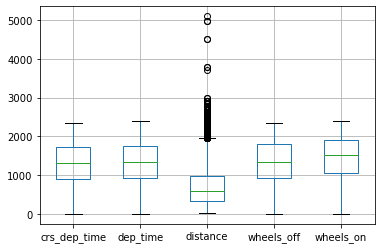

In [87]:
#plotting
graph1=data[['crs_dep_time','dep_time','distance','wheels_off','wheels_on']]
import matplotlib.pyplot as plt
graph1.boxplot()

#filtering extreme points
ext_1=graph1['distance']<4000

<AxesSubplot:>

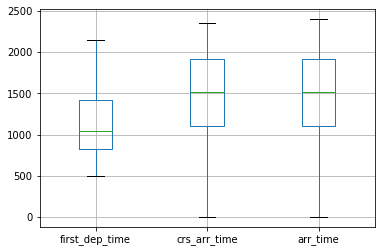

In [82]:
graph2=data[['first_dep_time','crs_arr_time','arr_time']]#,'cancelled','diverted']]
graph2.boxplot()

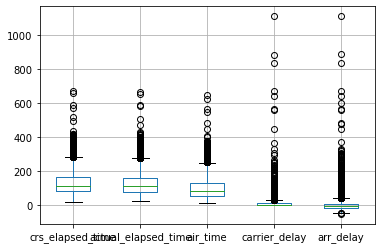

In [88]:
graph3=data[['crs_elapsed_time','actual_elapsed_time','air_time','carrier_delay','arr_delay']]
graph3.boxplot()

#filtering extreme points
ext_2=(graph3['carrier_delay']<800)&(graph3['arr_delay']<800)

<AxesSubplot:>

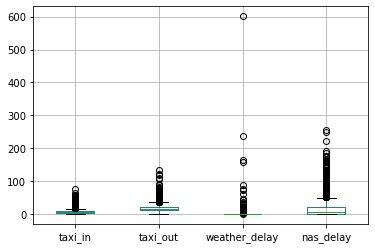

In [85]:
graph4=data[['taxi_in','taxi_out','weather_delay','nas_delay']]
graph4.boxplot()

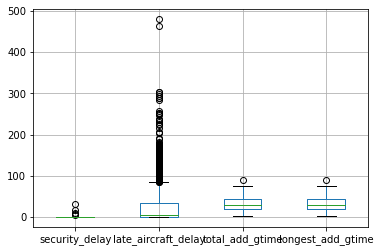

In [89]:
graph5=data[['security_delay','late_aircraft_delay','total_add_gtime','longest_add_gtime']]
graph5.boxplot()

#filtering extreme points
ext_5=graph5['late_aircraft_delay']<400

(array([9974.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          26.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

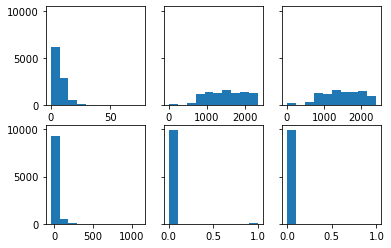

In [71]:
# Create two subplots and unpack the output array immediately
f, [[ax1, ax2,ax3],[ax4,ax5,ax6]] = plt.subplots(2, 3, sharey=True)
ax1.hist(graph2[['taxi_in']])
ax2.hist(graph2[['crs_arr_time']])
ax3.hist(graph2[['arr_time']])
ax4.hist(graph2[['arr_delay']])
#ax5.hist(graph2[['cancelled']])
#ax6.hist(graph2[['diverted']])

(array([2.016e+03, 4.700e+01, 1.100e+01, 1.000e+00, 1.000e+00, 3.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([   0. ,  111.1,  222.2,  333.3,  444.4,  555.5,  666.6,  777.7,
         888.8,  999.9, 1111. ]),
 <BarContainer object of 10 artists>)

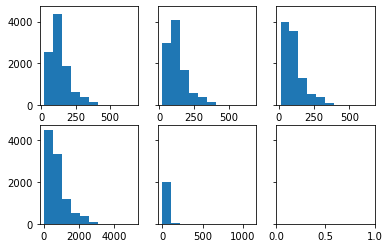

In [66]:
# Create two subplots and unpack the output array immediately
f, [[ax1, ax2,ax3],[ax4,ax5,ax6]] = plt.subplots(2, 3, sharey=True)
ax1.hist(graph3[['crs_elapsed_time']])
ax2.hist(graph3[['actual_elapsed_time']])
ax3.hist(graph3[['air_time']])
ax4.hist(graph3[['distance']])
ax5.hist(graph3[['carrier_delay']])
